# ARTIFICIAL NEURAL NETWORKS USING KERAS

## PERCEPTRON

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris()
X, y = iris['data'][:, 2:4], (iris['target'] == 0).astype(np.int)

In [3]:
per_clf = Perceptron()
per_clf.fit(X,y)
y_pred = per_clf.predict([[2, 0.5]])

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


## THE MULTILAYER PERCEPTRON AND BACKPROPAGATION

In [4]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'1.13.1'

In [5]:
keras.__version__

'2.2.4-tf'

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_train_full.dtype

dtype('uint8')

In [9]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coat'

### Creating a model using a Sequential API

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape=[28,28]),
                                 keras.layers.Dense(300, activation="relu"),
                                 keras.layers.Dense(100, activation="relu"),
                                 keras.layers.Dense(10, activation="softmax")
                                ])

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.layers

In [15]:
hidden1 = model.layers[1]

In [16]:
hidden1.name

'dense_3'

In [17]:
model.get_layer('dense_3') is hidden1

True

In [18]:
weights, biases = hidden1.get_weights()

In [19]:
weights

array([[-0.05694522, -0.03538627,  0.07162678, ...,  0.07394211,
        -0.06995127, -0.04036611],
       [-0.06955814,  0.00916329, -0.02573035, ..., -0.03607965,
         0.02096347,  0.02685624],
       [-0.01326674, -0.04599821,  0.02321346, ..., -0.04119897,
        -0.01145911, -0.0261678 ],
       ...,
       [ 0.00374067,  0.05549364, -0.06336515, ..., -0.04533087,
         0.04111351,  0.04629237],
       [-0.03745648, -0.0672619 , -0.06905165, ..., -0.05914446,
         0.01951272,  0.06572717],
       [ 0.02092694,  0.0091701 ,  0.0127853 , ...,  0.00034419,
         0.01823462,  0.00644349]], dtype=float32)

In [20]:
weights.shape

(784, 300)

In [21]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [22]:
biases.shape

(300,)

### Compiling the model

In [23]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"])

### Training and evaluating the model

In [24]:
history = model.fit(X_train, y_train, epochs = 30, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 31s 557us/sample - loss: 0.6924 - acc: 0.7726 - val_loss: 0.5210 - val_acc: 0.8252
Epoch 2/30
55000/55000 [==============================] - 28s 515us/sample - loss: 0.4831 - acc: 0.8324 - val_loss: 0.4532 - val_acc: 0.8498
Epoch 3/30
55000/55000 [==============================] - 28s 508us/sample - loss: 0.4413 - acc: 0.8460 - val_loss: 0.4062 - val_acc: 0.8610
Epoch 4/30
55000/55000 [==============================] - 27s 486us/sample - loss: 0.4138 - acc: 0.8550 - val_loss: 0.3908 - val_acc: 0.8664
Epoch 5/30
55000/55000 [==============================] - 28s 510us/sample - loss: 0.3956 - acc: 0.8614 - val_loss: 0.3893 - val_acc: 0.8654
Epoch 6/30
55000/55000 [==============================] - 27s 496us/sample - loss: 0.3787 - acc: 0.8659 - val_loss: 0.3962 - val_acc: 0.8638
Epoch 7/30
55000/55000 [==============================] - 28s 506us/sample - loss: 0.3653 - acc: 0.8702 -

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

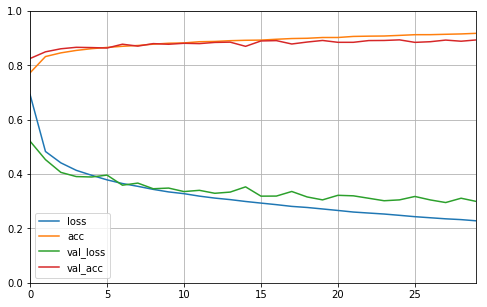

In [26]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [27]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 2s 218us/sample - loss: 2.3274 - acc: 0.8534


[2.3273586376190156, 0.8534]

### Using the model to make predictions

In [28]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [29]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [30]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [31]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

### Building a Regression MLP Using the Sequential API

In [32]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [33]:
housing = fetch_california_housing()

In [34]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

In [35]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [36]:
scaler = StandardScaler()

In [37]:
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [38]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [39]:
model.compile(loss = "mean_squared_error", optimizer = "sgd")
history = model.fit(X_train, y_train, epochs = 15, validation_data = (X_valid, y_valid))

Instructions for updating:
Use tf.cast instead.
Train on 11610 samples, validate on 3870 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/15
11610/11610 [==============================] - 2s 195us/sample - loss: 0.7335 - val_loss: 0.6233
Epoch 2/15
11610/11610 [==============================] - 3s 288us/sample - loss: 0.4652 - val_loss: 0.5644
Epoch 3/15
11610/11610 [==============================] - 2s 202us/sample - loss: 0.4556 - val_loss: 0.5819
Epoch 4/15
11610/11610 [==============================] - 2s 172us/sample - loss: 0.4298 - val_loss: 0.5542
Epoch 5/15
11610/11610 [==============================] - 2s 182us/sample - loss: 0.4329 - val_loss: 0.5106
Epoch 6/15
11610/11610 [==============================] - 2s 171us/sample - loss: 0.3882 - val_loss: 0.5056
Epoch 7/15
11610/11610 [==============================] - 3s 271us/sample - loss: 0.3807 - val_loss: 0.5327
Epoch 8/15
11610/11610 [==============================] - 2s 169us/sample - loss: 0.3961 - val_loss

In [40]:
mse_test = model.evaluate(X_test, y_test)

5160/5160 [==============================] - 0s 73us/sample - loss: 0.4439


In [41]:
X_new = X_test[:3]

In [42]:
y_pred = model.predict(X_new)

### Building complex models using Functional APIs

In [43]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [44]:
input_A = keras.layers.Input(shape = [5], name = "wide_input")
input_B = keras.layers.Input(shape = [6], name = "deep_input")
hidden1 = keras.layers.Dense(30, activation = "relu")(input_B)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name = "output")(concat)
model = keras.Model(inputs= [input_A, input_B], outputs = [output])

In [45]:
model.compile(loss = "mse", optimizer = keras.optimizers.SGD(lr = 1e-3))

In [46]:
X_train_A, X_train_B = X_train[:,:5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [47]:
history = model.fit((X_train_A, X_train_B), y_train, epochs = 15, validation_data = ((X_valid_A, X_valid_B), y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/15
11610/11610 [==============================] - 6s 500us/sample - loss: 1.9270 - val_loss: 1.0585
Epoch 2/15
11610/11610 [==============================] - 3s 295us/sample - loss: 0.7865 - val_loss: 0.8074
Epoch 3/15
11610/11610 [==============================] - 3s 297us/sample - loss: 0.6643 - val_loss: 0.7405
Epoch 4/15
11610/11610 [==============================] - 5s 446us/sample - loss: 0.6093 - val_loss: 0.7018
Epoch 5/15
11610/11610 [==============================] - 4s 321us/sample - loss: 0.5716 - val_loss: 0.6695
Epoch 6/15
11610/11610 [==============================] - 5s 461us/sample - loss: 0.5438 - val_loss: 0.6510
Epoch 7/15
11610/11610 [==============================] - 3s 296us/sample - loss: 0.5210 - val_loss: 0.6299
Epoch 8/15
11610/11610 [==============================] - 3s 297us/sample - loss: 0.5025 - val_loss: 0.6175
Epoch 9/15
11610/11610 [==============================] - 5s 430us/sample - loss: 0.487

In [48]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

5160/5160 [==============================] - 1s 128us/sample - loss: 0.4883


In [49]:
input_A = keras.layers.Input(shape = [5], name = "wide_input")
input_B = keras.layers.Input(shape = [6], name = "deep_input")
hidden1 = keras.layers.Dense(30, activation = "relu")(input_B)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name = "output")(concat)
aux_output = keras.layers.Dense(1, name = "aux_output")(hidden2)
model = keras.Model(inputs= [input_A, input_B], outputs = [output, aux_output])

In [50]:
model.compile(loss = ["mse", "mse"], loss_weights = [0.9, 0.1], optimizer= "sgd")

In [51]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs =15, validation_data = ([X_valid_A, X_valid_B], [y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/15
11610/11610 [==============================] - 5s 421us/sample - loss: 1.0116 - output_loss: 0.9116 - aux_output_loss: 1.9079 - val_loss: 0.6758 - val_output_loss: 0.6134 - val_aux_output_loss: 1.2357
Epoch 2/15
11610/11610 [==============================] - 6s 474us/sample - loss: 0.5222 - output_loss: 0.4690 - aux_output_loss: 1.0009 - val_loss: 0.5977 - val_output_loss: 0.5528 - val_aux_output_loss: 1.0015
Epoch 3/15
11610/11610 [==============================] - 5s 439us/sample - loss: 0.4728 - output_loss: 0.4324 - aux_output_loss: 0.8359 - val_loss: 0.5703 - val_output_loss: 0.5347 - val_aux_output_loss: 0.8917
Epoch 4/15
11610/11610 [==============================] - 6s 518us/sample - loss: 0.4434 - output_loss: 0.4109 - aux_output_loss: 0.7366 - val_loss: 0.5672 - val_output_loss: 0.5392 - val_aux_output_loss: 0.8185
Epoch 5/15
11610/11610 [==============================] - 4s 356us/sample - loss: 0.4333 - output_loss:

In [52]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

5160/5160 [==============================] - 1s 274us/sample - loss: 0.4386 - output_loss: 0.4199 - aux_output_loss: 0.5994


In [53]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

### Using the Subclassing API to Build Dynamic Models

In [54]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

### Saving and Restoring Models

In [55]:
model.save("my_keras.h5")

In [56]:
model = keras.models.load_model("my_keras.h5")

In [57]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras.h5")
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs =15, validation_data = ([X_valid_A, X_valid_B], [y_valid, y_valid]), callbacks = [checkpoint_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/15
11610/11610 [==============================] - 7s 579us/sample - loss: 0.3709 - output_loss: 0.3558 - aux_output_loss: 0.5064 - val_loss: 0.5340 - val_output_loss: 0.5145 - val_aux_output_loss: 0.7093
Epoch 2/15
11610/11610 [==============================] - 7s 632us/sample - loss: 0.3705 - output_loss: 0.3562 - aux_output_loss: 0.5001 - val_loss: 0.5329 - val_output_loss: 0.5140 - val_aux_output_loss: 0.7007
Epoch 3/15
11610/11610 [==============================] - 4s 360us/sample - loss: 0.3648 - output_loss: 0.3507 - aux_output_loss: 0.4933 - val_loss: 0.5425 - val_output_loss: 0.5238 - val_aux_output_loss: 0.7095
Epoch 4/15
11610/11610 [==============================] - 7s 566us/sample - loss: 0.3620 - output_loss: 0.3479 - aux_output_loss: 0.4888 - val_loss: 0.5263 - val_output_loss: 0.5069 - val_aux_output_loss: 0.7007
Epoch 5/15
11610/11610 [==============================] - 5s 389us/sample - loss: 0.3598 - output_loss:

In [58]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras.h5", save_best_only = True) ## by setting save_best_only to True, it saves the best possible model
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs =15, validation_data = ([X_valid_A, X_valid_B], [y_valid, y_valid]), callbacks = [checkpoint_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/15
11610/11610 [==============================] - 4s 355us/sample - loss: 0.3427 - output_loss: 0.3308 - aux_output_loss: 0.4486 - val_loss: 0.5252 - val_output_loss: 0.5080 - val_aux_output_loss: 0.6791
Epoch 2/15
11610/11610 [==============================] - 7s 589us/sample - loss: 0.3409 - output_loss: 0.3297 - aux_output_loss: 0.4448 - val_loss: 0.5266 - val_output_loss: 0.5092 - val_aux_output_loss: 0.6858
Epoch 3/15
11610/11610 [==============================] - 4s 363us/sample - loss: 0.3412 - output_loss: 0.3300 - aux_output_loss: 0.4433 - val_loss: 0.5269 - val_output_loss: 0.5101 - val_aux_output_loss: 0.6776
Epoch 4/15
11610/11610 [==============================] - 4s 361us/sample - loss: 0.3391 - output_loss: 0.3279 - aux_output_loss: 0.4399 - val_loss: 0.5251 - val_output_loss: 0.5091 - val_aux_output_loss: 0.6701
Epoch 5/15
11610/11610 [==============================] - 6s 540us/sample - loss: 0.3378 - output_loss:

### FineTuning Neural Networks Hyperparameters

In [59]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3,input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [60]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [61]:
keras_reg.fit(X_train, y_train, epochs = 10, validation_data = (X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 3s 222us/sample - loss: 1.2055 - val_loss: 0.7517
Epoch 2/10
11610/11610 [==============================] - 4s 315us/sample - loss: 0.6035 - val_loss: 0.6566
Epoch 3/10
11610/11610 [==============================] - 2s 171us/sample - loss: 0.5427 - val_loss: 0.6068
Epoch 4/10
11610/11610 [==============================] - 2s 170us/sample - loss: 0.4966 - val_loss: 0.5730
Epoch 5/10
11610/11610 [==============================] - 2s 173us/sample - loss: 0.4626 - val_loss: 0.5566
Epoch 6/10
11610/11610 [==============================] - 2s 168us/sample - loss: 0.4491 - val_loss: 0.5349
Epoch 7/10
11610/11610 [==============================] - 4s 376us/sample - loss: 0.4342 - val_loss: 0.5273
Epoch 8/10
11610/11610 [==============================] - 2s 173us/sample - loss: 0.4226 - val_loss: 0.5117
Epoch 9/10
11610/11610 [==============================] - 3s 227us/sample - loss: 0.414

In [62]:
mse_test = keras_reg.score(X_test, y_test)

5160/5160 [==============================] - 0s 76us/sample - loss: 0.4577


In [63]:
y_pred = keras_reg.predict(X_new)

In [64]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {"n_hidden": [0,1,2,3], "n_neurons": np.arange(1,100), "learning_rate": reciprocal(3e-4, 3e-2)}

In [65]:
rnd_cv = RandomizedSearchCV(keras_reg, param_distribs, cv = 5)

In [66]:
rnd_cv.fit(X_train, y_train, epochs = 10, validation_data = (X_valid, y_valid), callbacks = [keras.callbacks.EarlyStopping(patience = 10)])

Train on 9288 samples, validate on 3870 samples
Epoch 1/10
9288/9288 [==============================] - 1s 86us/sample - loss: 1.5585 - val_loss: 0.8167
Epoch 2/10
9288/9288 [==============================] - 0s 30us/sample - loss: 0.8687 - val_loss: 0.6689
Epoch 3/10
9288/9288 [==============================] - 0s 30us/sample - loss: 0.5774 - val_loss: 0.6043
Epoch 4/10
9288/9288 [==============================] - 0s 30us/sample - loss: 0.5342 - val_loss: 0.5942
Epoch 5/10
9288/9288 [==============================] - 0s 30us/sample - loss: 0.5838 - val_loss: 0.8831
Epoch 6/10
9288/9288 [==============================] - 0s 30us/sample - loss: 0.5879 - val_loss: 0.6743
Epoch 7/10
9288/9288 [==============================] - 0s 33us/sample - loss: 0.8708 - val_loss: 0.6384
Epoch 8/10
9288/9288 [==============================] - 0s 31us/sample - loss: 0.5280 - val_loss: 0.6193
Epoch 9/10
9288/9288 [==============================] - 0s 30us/sample - loss: 0.7546 - val_loss: 0.6035
Epoch 1

9288/9288 [==============================] - 0s 33us/sample - loss: 0.5030 - val_loss: 0.6526
Epoch 8/10
9288/9288 [==============================] - 0s 32us/sample - loss: 0.5006 - val_loss: 0.6406
Epoch 9/10
9288/9288 [==============================] - 0s 34us/sample - loss: 0.4982 - val_loss: 0.6508
Epoch 10/10
9288/9288 [==============================] - 0s 15us/sample - loss: 0.4926
Train on 9288 samples, validate on 3870 samples
Epoch 1/10
9288/9288 [==============================] - 1s 108us/sample - loss: 2.1220 - val_loss: 1.1634
Epoch 2/10
9288/9288 [==============================] - 0s 33us/sample - loss: 0.7087 - val_loss: 0.7312
Epoch 3/10
9288/9288 [==============================] - 0s 32us/sample - loss: 0.6696 - val_loss: 0.8719
Epoch 4/10
9288/9288 [==============================] - 0s 32us/sample - loss: 0.6893 - val_loss: 0.7070
Epoch 5/10
9288/9288 [==============================] - 0s 34us/sample - loss: 0.7187 - val_loss: 0.6431
Epoch 6/10
9288/9288 [=============

9288/9288 [==============================] - 9s 1ms/sample - loss: 1.3771 - val_loss: 0.6514
Epoch 2/10
9288/9288 [==============================] - 5s 526us/sample - loss: 0.4795 - val_loss: 0.5567
Epoch 3/10
9288/9288 [==============================] - 6s 645us/sample - loss: 0.3961 - val_loss: 0.5226
Epoch 4/10
9288/9288 [==============================] - 4s 444us/sample - loss: 0.3693 - val_loss: 0.5169
Epoch 5/10
9288/9288 [==============================] - 7s 747us/sample - loss: 0.3567 - val_loss: 0.4888
Epoch 6/10
9288/9288 [==============================] - 6s 676us/sample - loss: 0.3487 - val_loss: 0.4778
Epoch 7/10
9288/9288 [==============================] - 4s 465us/sample - loss: 0.3430 - val_loss: 0.4848
Epoch 8/10
9288/9288 [==============================] - 5s 536us/sample - loss: 0.3374 - val_loss: 0.4695
Epoch 9/10
9288/9288 [==============================] - 6s 654us/sample - loss: 0.3348 - val_loss: 0.4731
Epoch 10/10
9288/9288 [==============================] - 3s

9288/9288 [==============================] - 6s 597us/sample - loss: 0.3840 - val_loss: 0.5005
Epoch 8/10
9288/9288 [==============================] - 4s 448us/sample - loss: 0.3776 - val_loss: 0.4892
Epoch 9/10
9288/9288 [==============================] - 4s 480us/sample - loss: 0.3712 - val_loss: 0.5043
Epoch 10/10
9288/9288 [==============================] - 2s 181us/sample - loss: 0.3630
Train on 9288 samples, validate on 3870 samples
Epoch 1/10
9288/9288 [==============================] - 2s 173us/sample - loss: 4.0084 - val_loss: 1.8449
Epoch 2/10
9288/9288 [==============================] - 0s 38us/sample - loss: 1.1367 - val_loss: 0.9117
Epoch 3/10
9288/9288 [==============================] - 0s 39us/sample - loss: 0.7001 - val_loss: 0.7121
Epoch 4/10
9288/9288 [==============================] - 0s 40us/sample - loss: 0.6111 - val_loss: 0.6554
Epoch 5/10
9288/9288 [==============================] - 0s 41us/sample - loss: 0.5864 - val_loss: 0.6339
Epoch 6/10
9288/9288 [=========

9288/9288 [==============================] - 4s 468us/sample - loss: 4.6447 - val_loss: 3.0769
Epoch 2/10
9288/9288 [==============================] - 5s 513us/sample - loss: 2.1287 - val_loss: 1.6862
Epoch 3/10
9288/9288 [==============================] - 3s 301us/sample - loss: 1.3247 - val_loss: 1.2537
Epoch 4/10
9288/9288 [==============================] - 3s 323us/sample - loss: 1.0957 - val_loss: 1.1131
Epoch 5/10
9288/9288 [==============================] - 4s 442us/sample - loss: 0.9973 - val_loss: 1.0342
Epoch 6/10
9288/9288 [==============================] - 3s 307us/sample - loss: 0.9308 - val_loss: 0.9792
Epoch 7/10
9288/9288 [==============================] - 3s 306us/sample - loss: 0.8809 - val_loss: 0.9368
Epoch 8/10
9288/9288 [==============================] - 3s 323us/sample - loss: 0.8413 - val_loss: 0.9036
Epoch 9/10
9288/9288 [==============================] - 4s 437us/sample - loss: 0.8085 - val_loss: 0.8759
Epoch 10/10
9288/9288 [==============================] - 

9288/9288 [==============================] - 3s 276us/sample - loss: 0.4278 - val_loss: 0.5270
Epoch 8/10
9288/9288 [==============================] - 3s 275us/sample - loss: 0.4174 - val_loss: 0.5170
Epoch 9/10
9288/9288 [==============================] - 3s 330us/sample - loss: 0.4121 - val_loss: 0.5090
Epoch 10/10
9288/9288 [==============================] - 1s 116us/sample - loss: 0.4117
Train on 9288 samples, validate on 3870 samples
Epoch 1/10
9288/9288 [==============================] - 5s 508us/sample - loss: 1.4421 - val_loss: 0.8113
Epoch 2/10
9288/9288 [==============================] - 4s 402us/sample - loss: 0.6512 - val_loss: 0.6449
Epoch 3/10
9288/9288 [==============================] - 3s 273us/sample - loss: 0.5651 - val_loss: 0.6088
Epoch 4/10
9288/9288 [==============================] - 3s 290us/sample - loss: 0.5237 - val_loss: 0.5858
Epoch 5/10
9288/9288 [==============================] - 4s 444us/sample - loss: 0.4946 - val_loss: 0.5656
Epoch 6/10
9288/9288 [=====

9288/9288 [==============================] - 3s 291us/sample - loss: 1.6574 - val_loss: 1.4741
Epoch 2/10
9288/9288 [==============================] - 0s 46us/sample - loss: 0.9776 - val_loss: 0.7623
Epoch 3/10
9288/9288 [==============================] - 0s 45us/sample - loss: 3.0743 - val_loss: 0.6128
Epoch 4/10
9288/9288 [==============================] - 0s 45us/sample - loss: 0.7979 - val_loss: 3.1851
Epoch 5/10
9288/9288 [==============================] - 0s 44us/sample - loss: 0.7910 - val_loss: 0.6879
Epoch 6/10
9288/9288 [==============================] - 0s 43us/sample - loss: 1.6561 - val_loss: 0.5610
Epoch 7/10
9288/9288 [==============================] - 0s 45us/sample - loss: 0.6628 - val_loss: 0.6552
Epoch 8/10
9288/9288 [==============================] - 0s 45us/sample - loss: 1.5561 - val_loss: 0.5585
Epoch 9/10
9288/9288 [==============================] - 0s 45us/sample - loss: 0.6519 - val_loss: 0.5741
Epoch 10/10
9288/9288 [==============================] - 0s 24us/

9288/9288 [==============================] - 3s 364us/sample - loss: 0.6892 - val_loss: 0.7948
Epoch 8/10
9288/9288 [==============================] - 3s 355us/sample - loss: 0.6646 - val_loss: 0.7718
Epoch 9/10
9288/9288 [==============================] - 5s 491us/sample - loss: 0.6449 - val_loss: 0.7518
Epoch 10/10
9288/9288 [==============================] - 1s 157us/sample - loss: 0.6193
Train on 9288 samples, validate on 3870 samples
Epoch 1/10
9288/9288 [==============================] - 8s 886us/sample - loss: 2.5769 - val_loss: 1.5330
Epoch 2/10
9288/9288 [==============================] - 3s 360us/sample - loss: 1.0513 - val_loss: 1.0840
Epoch 3/10
9288/9288 [==============================] - 6s 617us/sample - loss: 0.8176 - val_loss: 0.9375
Epoch 4/10
9288/9288 [==============================] - 3s 355us/sample - loss: 0.7277 - val_loss: 0.8610
Epoch 5/10
9288/9288 [==============================] - 3s 351us/sample - loss: 0.6795 - val_loss: 0.8126
Epoch 6/10
9288/9288 [=====

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7f71b8a342b0>,
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_hidden': [0, 1, 2, 3], 'n_neurons': array([ 1,  2, ..., 98, 99]), 'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f71b7c74780>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [67]:
rnd_cv.best_params_

{'learning_rate': 0.006485618710550349, 'n_hidden': 3, 'n_neurons': 50}

In [69]:
rnd_cv.best_score_

-0.34331006009346654

In [71]:
final_model = rnd_cv.best_estimator_.model